In [2]:
import opendatasets

opendatasets.download('https://www.kaggle.com/competitions/dogs-vs-cats/data')

100%|███████████████████████████████████████████████████████████████████████████████| 812M/812M [12:22<00:00, 1.15MB/s]



Extracting archive .\dogs-vs-cats/dogs-vs-cats.zip to .\dogs-vs-cats


In [1]:
import os 
from PIL import Image

import torch 
from torchvision import transforms 

In [5]:
all_imgs = os.listdir('./dataset/train')


In [9]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(0.9), #ideally around 0.5
    transforms.RandomRotation(90),
    transforms.Resize((360,360)),
    transforms.ToTensor()
])

In [27]:
class CustDat(torch.utils.data.Dataset):
    def __init__(self,all_imgs,transform = None):
        self.all_imgs = all_imgs
        self.transform = transform
    def __len__(self):
        return len(self.all_imgs)
    def __getitem__(self,idx):
        img_name = self.all_imgs[idx]
        img = Image.open(os.path.join(os.getcwd(),'dataset','train',img_name))
        
        if self.transform:
            img = self.transform(img)
        return img

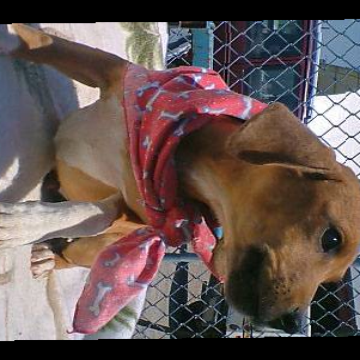

In [98]:
transforms.ToPILImage()(CustDat(all_imgs,transform)[20000])

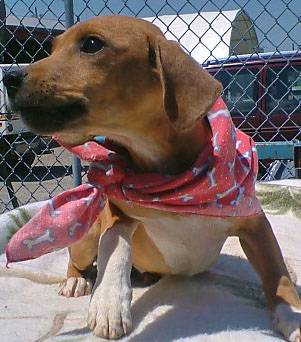

In [90]:
CustDat(all_imgs)[20000]